# This notebook displays ways of optimizing solutions for the famous "traveling salesman" problem.

In [1]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import algorithms as algos
from utils import generate_scenario, calculate_journey_distance

In [2]:
scenario_size = 100
num_nodes = 100

## generate a scenario and solve it using various algorithms

In [3]:
scenario = generate_scenario(num_nodes, scenario_size)

resulted_routes = [
    {"route": algos.greedy(scenario), "name": "greedy"},
    {"route": algos.local_search(scenario), "name": "local search"},
    {"route": algos.ant_colony_optimization.ant_colony_optimization(scenario), "name": "ant colony optimization"},
    {"route": algos.simulated_annealing.advanced(scenario), "name": "simulated annealing"}
]


In [4]:
def draw_result(scenario, route, scenario_size, image_size=500):
    image = Image.new('RGB', (image_size, image_size))
    draw = ImageDraw.Draw(image)
    
    drawing_scalar = image_size / scenario_size
    scaled_scenario = scenario * drawing_scalar
    
    route_in_xy = scaled_scenario[route + [route[0]]]
    
    for current, target in zip(route_in_xy[:-1], route_in_xy[1:]):
        draw.line([tuple(current), tuple(target)], fill=(0, 255, 0), width=3)
    
    r = 5
    for x, y in scaled_scenario:
        draw.ellipse((x-r, y-r, x+r, y+r), fill=(255,0,0,0))
    
    plt.figure(figsize=(15,15))
    plt.axis('off')
    plt.imshow(image)
    plt.show()

### show results

Algorithm:  greedy
Score:  906.2642743185673


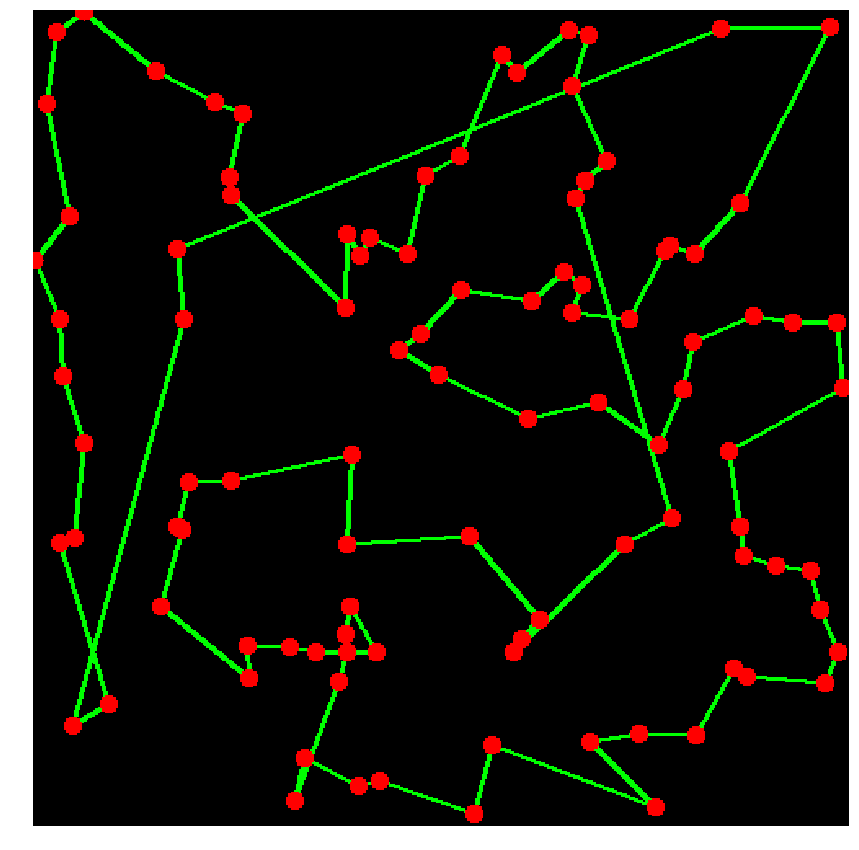

Algorithm:  local search
Score:  802.6421915650246


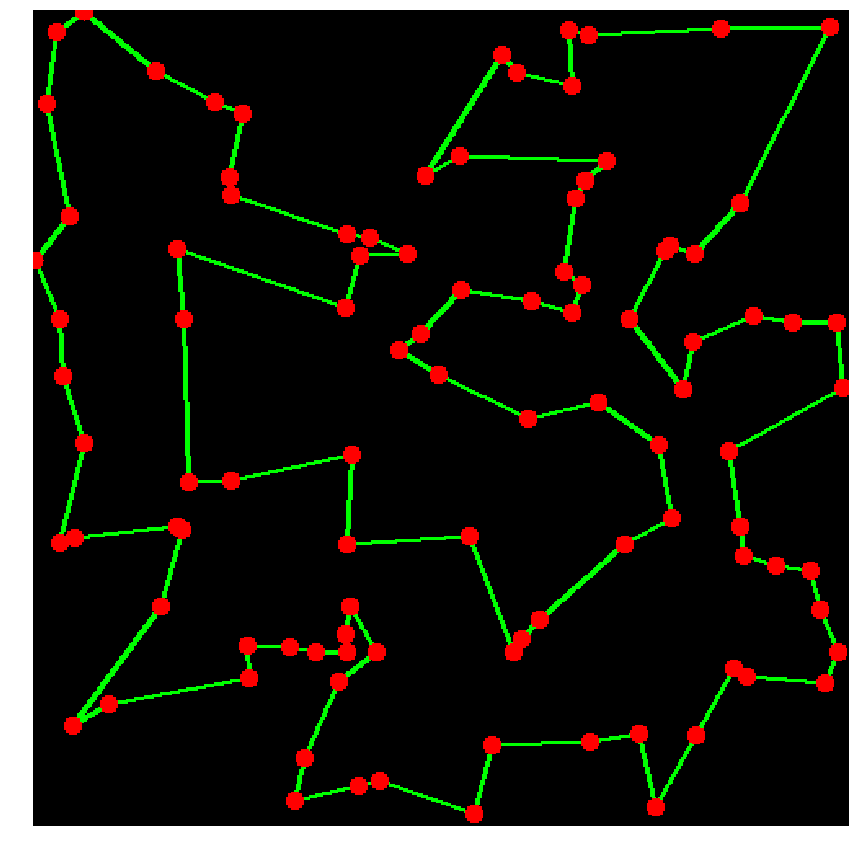

Algorithm:  ant colony optimization
Score:  943.2552677771611


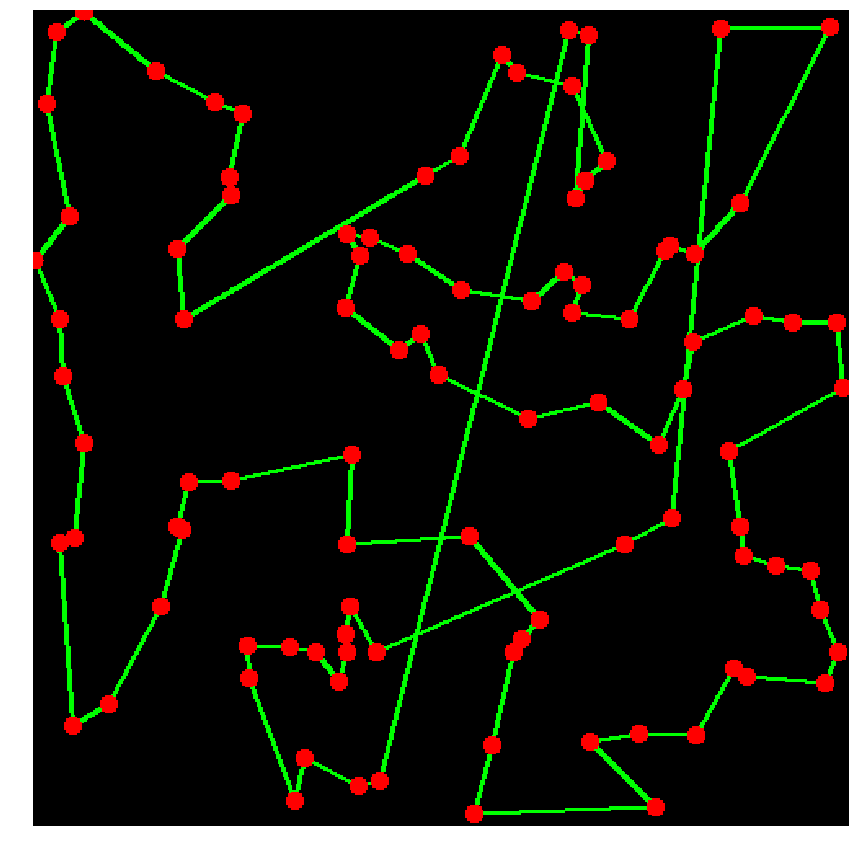

Algorithm:  simulated_annealing
Score:  770.0036050403891


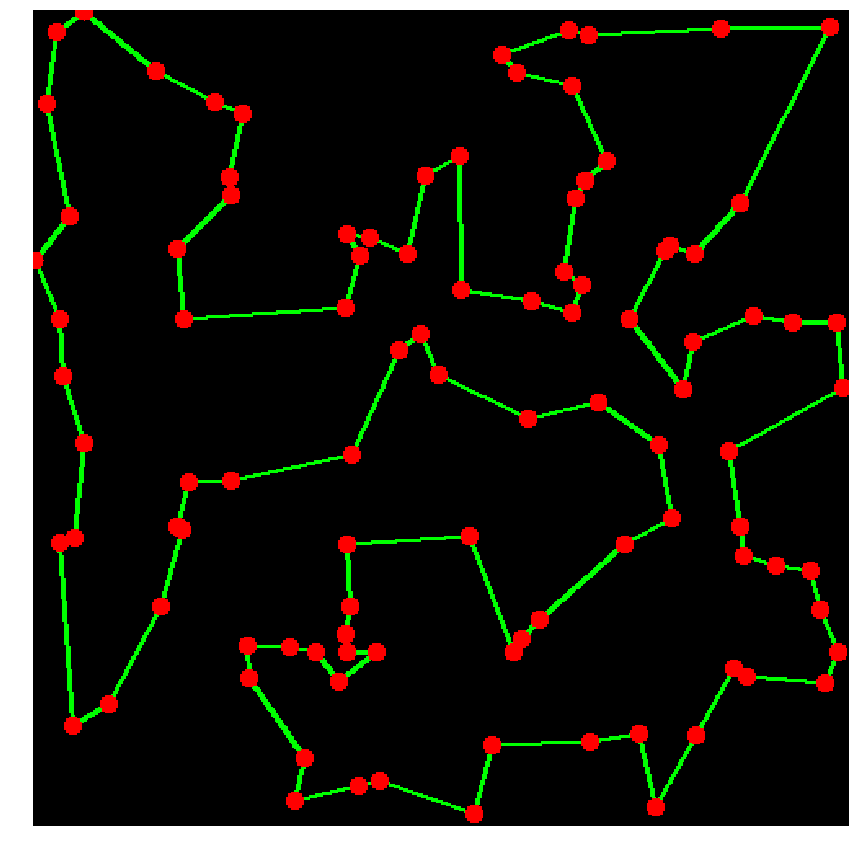

In [5]:
for resulted_route in resulted_routes:
    print("Algorithm: ", resulted_route["name"])
    print("Score: ", calculate_journey_distance(scenario[resulted_route["route"]]))
    draw_result(scenario, resulted_route["route"], scenario_size)

### Compare algorithms

In [6]:
def run_test(algorithms, num_scenarios, num_nodes):
    scenarios = [generate_scenario(num_nodes) for i in range(num_scenarios)]
    results = [
        [
            calculate_journey_distance(scenario[algorithm(scenario, **args)]) for scenario in scenarios
        ] for algorithm, args in algorithms
    ]
    average_scores = np.sum(results, axis=1) / num_scenarios
    print('average scores: ', average_scores)

In [7]:
run_test([[algos.local_search, {}], [algos.local_search, {'initiate_greedy': False}]], 5, 100)

average scores:  [806.36081567 817.03458212]
